(lesson7.3)=
# Lesson October 18th

During today's lesson it's demonstrated how you to handle Temperature influences, stiffness discontinuities and support settlement for statically indeterminate structures.

## Demonstration temperature influences

Given is the following structure:

```{figure} intro_data/structure.svg
:align: center
```

To look at the temperature influences, it's easier to look at a statically determinate structure. We could look at the statically determinate structure with the unknown statical indeterminate force $B_\text{v}$ with the condition that the displacement at $\text{B}$ is $0$.

```{figure} intro_data/structure_deter.svg
:align: center
```

### Displacement due to temperature influence
Let's focus on the displacement due to the temperature influence first. As the top is warmer than the bottom of the beam, the top of the beam will extend with respect to the bottom side. For the statically determinate beam this will lead to a deflection downwards:

```{figure} intro_data/disp_deter_sun.svg
:align: center
```

The corresponding curvature $\kappa^\text{T}$ equals $\alpha \cfrac{\Delta T}{h} = 0.001 \text{ }\frac{1}{\text{m}}$ (◠), which is constant over the full beam:

```{figure} intro_data/curv_sun.svg
:align: center
```

The kinematically equivalent moment distribution has a couple at $\text{B}$ of which the value follows from $M = \kappa \cdot EI = 6 \text{ kNm}$ (↺)

```{figure} intro_data/moment.svg
:align: center
```

Using the forget-me-nots, this leads to a displacement at $\text{B}$ of $\cfrac{M \cdot L ^2}{2 EI} = 18 \text{ mm}$ (↓)

```{figure} intro_data/disp_deter_sun_2.svg
:align: center
```

### Displacement due to statically indeterminate support reaction

If we only consider the statically indeterminate support reaction:

```{figure} intro_data/structure_deter_Bv.svg
:align: center
```

The displacement can be calculated as $w_\text{B} = \cfrac{B_\text{v}*L^3}{3EI} = \cfrac{3}{250}B_\text{v}$ (↑)

### Solve for statically indeterminate support reaction
As the total displacement at $\text{B}$ should be zero, $B_\text{v}$ can be calculated:

$$18 = \cfrac{3}{250}B_\text{v} $$

$$ B_\text{v} = 1.5 \text{ kN (↑)}$$

### Find moment distribution and displacements
The curvature due to the temperature influence doesn't cause internal stresses. However, the support reactions does. This gives the following moment distribution:

```{figure} intro_data/M-line.svg
:align: center
```

The full displacement can be found by applying the forget-me-nots, leading to:

```{figure} intro_data/disp_total.svg
:align: center
```

## Demonstration support settlement

Given is the following structure:

```{figure} intro_data/struc2.svg
:align: center
```

The displacement can be incorporated in the calculation using the force- or displacement method. This structure is solved using 'hoekveranderingsvergelijkingen', leading to the following statically determinate structure:

```{figure} intro_data/struc2_deter.svg
:align: center
```

The positive rotations are defined as follows:


```{figure} intro_data/struc2_phi.svg
:align: center
```

The first displacement condition can be filled in using forget-me-nots. The support settlement is taken into account as a (real) displacement and thus rotation:

$$\begin{array}{c}
\varphi _{\rm{B}}^{{\rm{AB}}} = \varphi _{\rm{B}}^{{\rm{BC}}}\\
\cfrac{{ - {M_{\rm{B}}} \cdot 4}}{{3 \cdot EI}} + \cfrac{{17 \cdot {4^3}}}{{24 \cdot EI}} - \cfrac{{{w_{\rm{B}}}}}{4} = \cfrac{{{M_{\rm{B}}} \cdot 6}}{{3 \cdot EI}} - \cfrac{{{M_{\rm{C}}} \cdot 6}}{{6 \cdot EI}} + \cfrac{{{w_{\rm{B}}}}}{6}
\end{array}$$

The second displacement condition gives similarly:

$$\begin{array}{c}
\varphi_\text{C} = 0 \\
-\cfrac{M_\text{B} \cdot 6}{3 \cdot EI} = \cfrac{M_\text{C} \cdot 6}{6 \cdot EI} + \cfrac{w_\text{B}}{6} = 0
\end{array}$$

Solving this system of two equation gives: $M_\text{B} = -128 \text{kNm}$ and $M_\text{C} = -132 \text{ kNm}$

1/1000

6

9/500

3/2

3*Bv/250

9

0.00450000000000000

0.00562500000000000

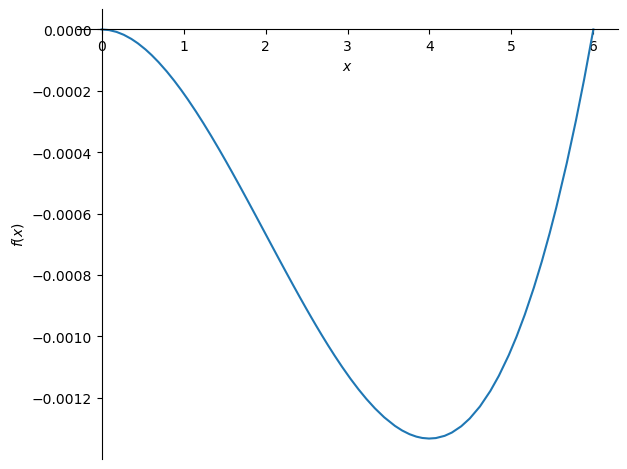

-0.00112500000000000

In [2]:
import sympy as sym

alpha, L, Delta_T, h = sym.symbols('alpha, L, Delta_T, h')
EI = sym.symbols('EI')

alpha = sym.nsimplify(10**-5)
Delta_T = 20
EI = 6000
L = 6
h = sym.nsimplify(0.2)

kappa = alpha * Delta_T / h
display(kappa)

M = kappa * EI
display(M)

w = M * L**2 / EI / 2
display(w)

F = w * 3 * EI / L **3 
display(F)

Bv = sym.symbols('Bv')
display( Bv * L **3 / EI / 3 )

M_A = F * L
display(M_A)

w_halfway = M * (L/2)**2 / EI / 2
display(w_halfway)

w_halfway_2 = F * L/2 * (L/2)**2 / EI / 2 + F * (L/2)**3 / 3 / EI
display(w_halfway_2)

x = sym.symbols('x')
w_halfway = M * (x)**2 / EI / 2 -  F * (L-x) * (x)**2 / EI / 2 - F * (x)**3 / 3 / EI

sym.plot(w_halfway, (x, 0, L))

display(w_halfway.subs(x, L/2))

In [10]:
M_C, M_D, w_B = sym.symbols('M_C, M_D, w_B')

EI = 34000

w_B = sym.nsimplify(24 / 1000)

eq1 = sym.Eq(-M_C * 4 / EI / 3 + sym.nsimplify(4**3) * 17 / 24 / EI - w_B / 4, M_C * 6 / 3 / EI - M_D * 6 / 6 / EI + w_B / 6)
eq2 = sym.Eq(-M_C * 6 / EI / 6 + M_D * 6 / 3 / EI + w_B / 6, 0)

sol = sym.solve([eq1, eq2], (M_C, M_D))
display(sol)

{M_C: -128, M_D: -132}

## Stiffness influences

Given is the following structure:

```{figure} intro_data/struc3.svg
:align: center
```

We'll investigate the influence of the stiffness of the right part.

### High stiffness

Let's start with a high stiffness, so $n \to \infty$. If beam $\text{BC}$ is infinitely stiff, this part of the beam cannot bend. Therefore also the rotation in $\text{B}$ is fixed, effectively simplifying the structure to:

```{figure} intro_data/infty.svg
:align: center
```

Using the force or displacement method, this leads to a moment line:

```{figure} intro_data/3_M-line_1.svg
:align: center
```

For the full structure, the moment line then leads to:

```{figure} intro_data/3_M-line_2.svg
:align: center
```

### Low stiffness

For a low stiffness, so $n \to 0$ the part $\text{BC}$ of the beam can very easily bend, effectively simplifying the structure to:

```{figure} intro_data/0.svg
:align: center
```

For this statically determinate struture, the moment line is:

```{figure} intro_data/3_M-line_3.svg
:align: center
```

For the full structure, the moment line then leads to:

```{figure} intro_data/3_M-line_4.svg
:align: center
```

### Envelope of moment line

Combining both solution, the full envelop of moment lines looks like:

```{figure} intro_data/3_M-line_5.svg
:align: center
```

In practise, the differences will not be as extreme as $0$ or $\infty$, leading to moments line within the envelope.

### Exact calculation

Using the usual force or displacement method with an unknown stiffness of $\text{BC}$ of $nEI$, the extreme moments can be found as:

$$
M_\text{B} = \cfrac{n}{n+1} \ \cfrac{3}{16} \ FL
$$

$$
M_{\text{at }F} = \left(-\cfrac{n}{n+1} \ \cfrac{3}{16} + \cfrac{1}{4} \right) FL
$$

This leads to the following diagrams:

```{figure} intro_data/output.svg
:align: center
```

Showing how for $n=0$ and $n \to \infty$ the moments approach the extreme values obtained before.

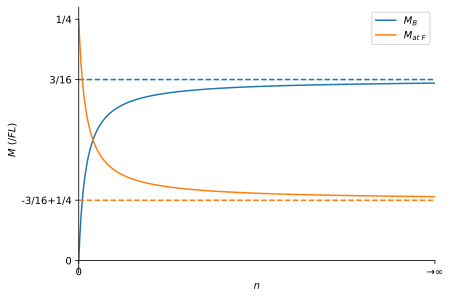

In [47]:
import numpy as np
%config InlineBackend.figure_formats = ['svg']
n = np.linspace(0, 50, 1000)
M_B = n / (n+1) * 3/16
M_C = -n / (n+1) * 3/16 + 1/4

import matplotlib.pyplot as plt
plt.plot(n, M_B, label='$M_B$')
# get color of last line
line = plt.gca().lines[-1]
color = line.get_color()
plt.plot([0, 50], [3/16,3/16], '--',color=color)

plt.plot(n, M_C, label='$M_{at \ F}$')
line = plt.gca().lines[-1]
color = line.get_color()
plt.plot([0, 50], [-3/16+1/4,-3/16+1/4], '--',color=color)
plt.xlim([0,50])
plt.xlabel('$n$')
plt.ylabel('$M \ (/{FL})$')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
# add yticks at 3/16 and -3/16+1/4
plt.yticks([0,3/16, -3/16+1/4, 1/4], ['0', '3/16', '-3/16+1/4', '1/4'])
plt.xticks([0, 50], ['0', '$ →  \infty$'])
plt.legend();